# Part2. Model design 1 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import SpecificityAtSensitivity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#load the original data
df1=pd.read_csv("../Data/kag_risk_factors_cervical_cancer.csv")

#load the processed datasets:
X_train=pd.read_csv("../Data/X_train_preprocessed.csv")
X_test=pd.read_csv("../Data/X_test_preprocessed.csv")
X_validate=pd.read_csv("../Data/X_validate_preprocessed.csv")
y_train=pd.read_csv("../Data/y_train_preprocessed.csv")
y_test=pd.read_csv("../Data/y_test_preprocessed.csv")
y_validate=pd.read_csv("../Data/y_validate_preprocessed.csv")

In [3]:
X_train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-1.531373,-0.302480,-1.064614,-0.836137,0.0,-0.307318,-0.208218,0.0,-0.556973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.237878,1.427985,-0.001620,2.657531,1.0,-0.004815,0.325027,1.0,-0.412462,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.941623,-0.302480,-0.710283,-0.137403,0.0,-0.307318,-0.208218,1.0,-0.412462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.823672,-0.302480,-0.710283,-0.836137,0.0,-0.307318,-0.208218,0.0,-0.556973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.007129,0.274342,0.707042,-0.836137,0.0,-0.307318,-0.208218,0.0,-0.556973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#show the processed X_train file:
X_train.tail(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
654,-0.587772,-0.879301,-0.001620,-0.137403,0.0,-0.307318,-0.208218,1.0,-0.510729,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,0.355828,-0.302480,-1.418945,0.561330,1.0,4.945406,1.145403,0.0,-0.556973,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
y_train.tail(2)

,Biopsy
654,0
655,1


## Model

In [6]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

The data in unbalanced, let's try to correct the bias:

In [7]:
neg, pos = np.bincount(df1['Biopsy'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 858
    Positive: 55 (6.41% of total)



In [11]:

model = Sequential() 

#Input layer
model.add(Dense(units=500, 
            input_dim=31, # i have 31 features
            kernel_initializer='uniform', # all features have the same weight
            activation='relu'
               ))
model.add(Dropout(0.5))  #randomly sets 0.5 units to 0. To prevent overfitting
#Hidden layer 1
model.add(Dense(units=500,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

#model(output_bias=initial_bias)

print(model.summary()) #for showing the structure and parameters

# Defining how to measure performance
model.compile(loss='binary_crossentropy',   
              optimizer='adam',
               metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),'accuracy'])


# Train the model
# Verbose=2, showing loss and accuracy change timely
#remove batch_size, the dataset is small. -> it increases recall.
train_history = model.fit(x=X_train, y=y_train,  
                          validation_split=0.2, epochs=30, verbose=2) 



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               16000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 501       
Total params: 267,001
Trainable params: 267,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
17/17 - 0s - loss: 0.4206 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.9160 - va

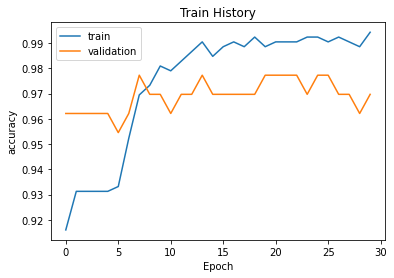

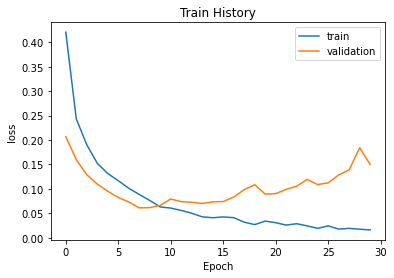

In [12]:
#visualize the loss and accuracy after each epoch
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

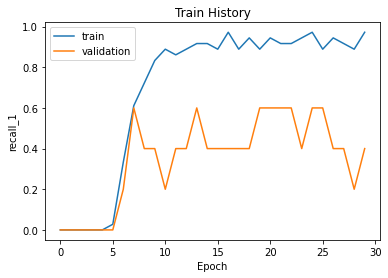

In [14]:
#visualize the loss and accuracy after each epoch
show_train_history(train_history,'recall_1','val_recall_1')


In [17]:
train_predictions_baseline = model.predict(X_train)
test_predictions_baseline = model.predict(X_test)


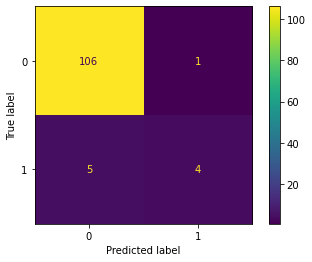

In [18]:
p=0.5
cm = confusion_matrix(y_test, test_predictions_baseline > p)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [19]:
scores = model.evaluate(X_test, y_test)
print('\n')
print('accuracy=',scores[1])



4/4 [==============================] - 0s 8ms/step - loss: 0.3504 - precision_1: 0.8000 - recall_1: 0.4444 - accuracy: 0.9483


accuracy= 0.800000011920929


Recall is still similar to what LR accomplished. We need a model designed specifically for imbalanced datasets.